- **In this notebook, "preprocessed.csv" will be used.**
- **I will split df into training and testing set and then augment data to X_train using nlpaug. I will generate 6 new  sentences using one sentence of class=0 (Hate)**
- **Text vectorization using pretrained fasttext model**
- **Different models tested with or without oversampling techniques**

In [1]:
# !pip install nlpaug
# !pip install compress-fasttext

import pandas as pd
import nltk
from nltk import pos_tag
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
import re
import string
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Loading Preprocesssed data

In [4]:
df=pd.read_csv('preprocessed_data.csv')

In [5]:
df.sample(10)

,class,tweet,clean_text
13824,1,Photo: Happy Friday bitches #kimorablac http:/...,photo happy friday bitches None
16606,0,RT @NateThaAlmighty: niggas talk more than bit...,niggas talk more than bitches these days
13784,1,People are such bitches!!! Complaining over st...,people are such bitches complaining over stupi...
6883,1,@rachh_burkhart talkin bout the retard your si...,talkin about the retard your sittin on
22482,0,Washing my coon hair,washing my coon hair
13381,2,No girls no hoes just me myself and I,no girls no hoes just me myself and i
11231,1,I'm always dumb too a extra slow ass bitch &#1...,i am always dumb too a extra slow ass bitch 12...
17324,1,RT @SirJakel: The awkward moment when you're c...,the awkward moment when you are changing in th...
16104,1,RT @LA_Everyday: @MJCANDANCE @PacDaGoat @Devot...,what the fuck this bitch sounds retarded
7833,2,Ask the governor how we are supposed to pay fo...,ask the governor how we are supposed to pay fo...


### As we have preprocessed data, we will now train test split data in training and testing datasets

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['class'], test_size=0.2,stratify=df['class'], random_state=42)

In [7]:
print ("No. of samples in training data: ", X_train.shape[0] )

No. of samples in training data:  19826


In [8]:
print ("No. of samples in testing data: ", X_test.shape[0] )

No. of samples in testing data:  4957


In [9]:
print("Percentage of class=0(Hate) in training set: {:0.2f} %".format((y_train.value_counts()[0]/len(y_train)) *100 ))
print("Percentage of class=1(Offensive) in training set: {:0.2f} %".format((y_train.value_counts()[1]/len(y_train)) *100 ))
print("Percentage of class=2(Neither) in training set: {:0.2f} %".format((y_train.value_counts()[2]/len(y_train)) *100 ))

Percentage of class=0(Hate) in training set: 5.77 %
Percentage of class=1(Offensive) in training set: 77.43 %
Percentage of class=2(Neither) in training set: 16.80 %


In [10]:
print("Percentage of class=0(Hate) in testing set: {:0.2f} %".format((y_test.value_counts()[0]/len(y_test)) *100 ))
print("Percentage of class=1(Offensive) in testing set: {:0.2f} %".format((y_test.value_counts()[1]/len(y_test)) *100 ))
print("Percentage of class=2(Neither) in testing set: {:0.2f} %".format((y_test.value_counts()[2]/len(y_test)) *100 ))

Percentage of class=0(Hate) in testing set: 5.77 %
Percentage of class=1(Offensive) in testing set: 77.43 %
Percentage of class=2(Neither) in testing set: 16.80 %


In [11]:
y_test.value_counts()

1    3838
2     833
0     286
Name: class, dtype: int64

### Since data in training set is highly imbalanced we will generate new texts with existing dataset of class 0(Hate)

## Data Augmentation

In [12]:
import nlpaug.augmenter.word as naw
import nlpaug.flow as nafc
from nlpaug.util import Action

In [13]:
aug = naw.SynonymAug(aug_src='wordnet',aug_max=3)

### We are generating 6 texts for every text of class 0 with help of nlpaug's synonym word augmentation

In [14]:
augmented_sentences=[]
augmented_sentences_labels=[]
for i in X_train.index:
      if y_train[i]==0:
        temps=aug.augment(X_train[i],n=6)
        for sent in temps:
              augmented_sentences.append(sent)
              augmented_sentences_labels.append(0)

In [15]:
X_train=X_train.append(pd.Series(augmented_sentences),ignore_index=True)
y_train=y_train.append(pd.Series(augmented_sentences_labels),ignore_index=True)

print(X_train.shape)
print(y_train.shape)

(26690,)
(26690,)


In [16]:
y_train.value_counts()

1    15352
0     8008
2     3330
dtype: int64

In [17]:
print("Percentage of class=0(Hate) in training set after aug : {:0.2f} %".format((y_train.value_counts()[0]/len(y_train)) *100 ))

Percentage of class=0(Hate) in training set after aug : 30.00 %


In [18]:
df[df['class']==0].iloc[10,2]

'jackie a retard None at least i can make a grilled cheese'

In [19]:
naw.SynonymAug(aug_src='wordnet',aug_max=3).augment("jackie a retard None at least i can make a grilled cheese",n=6)

['jackie a retard None at least i fanny make a grilled high mallow',
 'jackie a retard None at least i can build a broiled cheese',
 'jackie a retard None at least i can produce a barbecued cheese',
 'jackie a retard None at least i can pretend a broiled cheese',
 'jackie a retard None at least i john arrive at a grilled cheese',
 'jackie a retard None at least i can gain a grilled malva sylvestris']

### Removing stopwords,emoticons, non alphanumeric words, punctuations and lemmatizing X_train

In [20]:
# ======================================================================================================================
# Creating list of Stop-words (pre-processing)
# ======================================================================================================================
new_stopwords=['say', 'get', 'go', 'know', 'may', 'need', 'make', 'see', 'want', 'come', 'take', 'use','life','money',
               'little','even','head','right','eat','laugh','well','red','bad','best','year','today','watch','win','play',
               'new','game','good','would', 'can', 'zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'may',
           'also', 'across', 'among', 'beside', 'yet', 'within', 'mr', 'bbc', 'image', 'getty','woman','boy','guy'
           'de', 'en', 'caption', 'copyright', 'something', 'tag', 'wait', 'set', 'put', 'add', 'post', 'give', 'way', 'check', 'think',
          'www', 'must', 'look', 'call', 'minute', 'com', 'thing', 'much', 'happen','still','tell','talk','never','every,'
          'quarantine', 'day', 'time', 'week', 'amp', 'find','None','man','girl','really','real','people','love','like','let','back' ]
stop_words = set(list(stopwords.words('english')) + ['"', '|'] + new_stopwords)

# ======================================================================================================================
# Creating list of Emoticons (pre-processing)
# ======================================================================================================================
# Happy Emoticons
emoticons_happy = {':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}', ':^)', ':-D', ':D', '8-D',
               '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D', '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P',
               ':-P', ':P', 'X-P', 'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)', '<3'}

# Sad Emoticons
emoticons_sad = {':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<', ':-[', ':-<', '=\\', '=/',
             '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c', ':c', ':{', '>:\\', ';('}

# Combine sad and happy emoticons
emoticons = emoticons_happy.union(emoticons_sad)

In [21]:
# ======================================================================================================================
# Removing Non-alphanumeric words (pre-processing)
# ======================================================================================================================

# function to keep only alpharethmetic values
def only_alpha(tokenized_text):
    text_alpha = []
    for word in tokenized_text:
        word_alpha = re.sub('[^a-z A-Z]+', ' ', word)
        text_alpha.append(word_alpha)
    return text_alpha

# ======================================================================================================================
# Applying Lemmatization(pre-processing)
# ======================================================================================================================

# convert POS tag to wordnet tag in order to use in lemmatizer
lemmatizer = WordNetLemmatizer()

def nltk_pos_tagger(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None
#lemmatizing
def lemmatizing(tokenized_text):

    nltk_tagged = nltk.pos_tag(tokenized_text)  
    wordnet_tagged = map(lambda x: (x[0], nltk_pos_tagger(x[1])), nltk_tagged)
    lemma_list = []

    for word, tag in wordnet_tagged:
        if tag is None:
            lemma_list.append(word)
        else:        
            lemma_list.append(lemmatizer.lemmatize(word, tag))
    return lemma_list

In [22]:
def preprocess_lemma(text):
        # tokenize text
        tokenized_text = word_tokenize(text)

        # remove all non alpharethmetic values
        tokenized_text = only_alpha(tokenized_text)

        # lemmatize / stem words
        lemmatized_text =lemmatizing(tokenized_text)


        filtered_text = []
        # looping through conditions
        for word in lemmatized_text:
            word = word.strip()
            # check tokens against stop words, emoticons and punctuations
            # biggest english word: Pneumonoultramicroscopicsilicovolcanoconiosis (45 letters)
            if (word not in stop_words and word not in emoticons and word not in string.punctuation
                and not word.isspace() and len(word) > 1 and len(word) < 46):
                
                filtered_text.append(word)



        return filtered_text

In [23]:
X_train

0                                  talking angela is a hoe
1        laugh out loud they tricking niggas left and r...
2                     128514 128514 bitches get stuff done
3                                    bitch i got the flame
4                                         good bitch choke
                               ...                        
26685    dyke bitches kill me thinkin they truly bring ...
26686    dyke bitches kill maine thinkin they really go...
26687    dyke bitches kill pine tree state thinkin they...
26688    dyke bitch kill me thinkin they really got hoe...
26689    dam bitches down me thinkin they really got ho...
Length: 26690, dtype: object

In [24]:
 X_train=[preprocess_lemma(item) for item in X_train]

In [25]:
len(X_train)

26690

In [26]:
X_train[0]

['angela', 'hoe']

### Removing stopwords,emoticons, non alphanumeric words, punctuations and lemmatizing X_test

In [27]:
X_test

15814    there is a gift shop at the 9 11 museum and th...
3158     i need some red green amp yellow pants amp hel...
24587    this the one 128076 hoes do not be wanting you...
360                       i can turn yo bitch into a eater
16123    shaking my head you got ebola now 8220 i stick...
                               ...                        
7975     because of the message that sends to None resi...
8208     brush this nigga always falls asleep 128530 12...
583      we are out here and we are queer 2 4 6 hut we ...
17811    why give a bitch you heart when she rather hav...
16594    almost forgot posing as an old brand will not ...
Name: clean_text, Length: 4957, dtype: object

In [28]:
 X_test= [preprocess_lemma(str(item)) for item in X_test]

In [29]:
len(X_test)

4957

In [30]:
X_test[0]

['gift',
 'shop',
 'museum',
 'charge',
 'admission',
 'mass',
 'grave',
 'fuck',
 'cunt',
 'disgrace']

## Word2Vec Vectorization for X_train, X_test

In [31]:
import compress_fasttext
small_model = compress_fasttext.models.CompressedFastTextKeyedVectors.load("cc.en.300.compressed.bin")

In [32]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += small_model[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

In [33]:
wordvec_arrays = np.zeros((len(X_train), 300)) 
for i in range(len(X_train)):
    wordvec_arrays[i,:] = word_vector(X_train[i], 300)

In [34]:
X_train_vectorized=wordvec_arrays

In [35]:
wordvec_arrays_test = np.zeros((len(X_test), 300)) 
for i in range(len(X_test)):
    wordvec_arrays_test[i,:] = word_vector(X_test[i], 300)

In [36]:
X_test_vectorized=wordvec_arrays_test

In [37]:
print (X_train_vectorized.shape)
print (X_test_vectorized.shape)

(26690, 300)
(4957, 300)


In [38]:
print(y_train.shape)
print(y_test.shape)

(26690,)
(4957,)


## Model Building

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
lr = LogisticRegression(multi_class='auto', solver='saga', random_state = 0, penalty='elasticnet', l1_ratio=1,max_iter=1000)
lr.fit(X_train_vectorized, y_train.ravel())
y_pred = lr.predict(X_test_vectorized)

In [40]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 125  148   13]
 [ 467 3288   83]
 [ 192  178  463]]
              precision    recall  f1-score   support

           0       0.16      0.44      0.23       286
           1       0.91      0.86      0.88      3838
           2       0.83      0.56      0.67       833

    accuracy                           0.78      4957
   macro avg       0.63      0.62      0.59      4957
weighted avg       0.85      0.78      0.81      4957



In [41]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [42]:
gnb = GaussianNB()
bnb = BernoulliNB()

In [43]:
gnb.fit(X_train_vectorized,y_train)
y_pred = gnb.predict(X_test_vectorized)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 197   57   32]
 [1601 1964  273]
 [ 476   37  320]]
              precision    recall  f1-score   support

           0       0.09      0.69      0.15       286
           1       0.95      0.51      0.67      3838
           2       0.51      0.38      0.44       833

    accuracy                           0.50      4957
   macro avg       0.52      0.53      0.42      4957
weighted avg       0.83      0.50      0.60      4957



In [44]:
bnb.fit(X_train_vectorized,y_train)
y_pred = bnb.predict(X_test_vectorized)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 108  112   66]
 [ 708 2718  412]
 [ 206   63  564]]
              precision    recall  f1-score   support

           0       0.11      0.38      0.17       286
           1       0.94      0.71      0.81      3838
           2       0.54      0.68      0.60       833

    accuracy                           0.68      4957
   macro avg       0.53      0.59      0.52      4957
weighted avg       0.82      0.68      0.74      4957



In [45]:
from sklearn.svm import SVC
svc=svc =SVC(kernel='rbf', gamma=0.5, C=0.1)
svc.fit(X_train_vectorized,y_train)
y_pred = svc.predict(X_test_vectorized)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[ 116  168    2]
 [ 413 3408   17]
 [ 373  333  127]]
              precision    recall  f1-score   support

           0       0.13      0.41      0.20       286
           1       0.87      0.89      0.88      3838
           2       0.87      0.15      0.26       833

    accuracy                           0.74      4957
   macro avg       0.62      0.48      0.44      4957
weighted avg       0.83      0.74      0.74      4957



In [46]:
svc_poly=svc =SVC(kernel='poly',degree=3, C=1)
svc_poly.fit(X_train_vectorized,y_train)
y_pred = svc_poly.predict(X_test_vectorized)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[ 115  160   11]
 [ 361 3415   62]
 [ 231  235  367]]
              precision    recall  f1-score   support

           0       0.16      0.40      0.23       286
           1       0.90      0.89      0.89      3838
           2       0.83      0.44      0.58       833

    accuracy                           0.79      4957
   macro avg       0.63      0.58      0.57      4957
weighted avg       0.84      0.79      0.80      4957



## After Oversampling

In [47]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt

### SMOTE

In [48]:
oversample = SMOTE()
X_train_oversampled, y_train_oversampled = oversample.fit_resample(X_train_vectorized, y_train)

Class=1, n=15352 (57.520%)
Class=2, n=15352 (57.520%)
Class=0, n=15352 (57.520%)


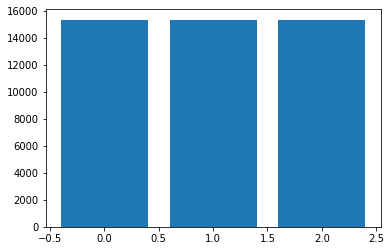

In [49]:
counter = Counter(y_train_oversampled)
for k,v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [50]:
lr_over = LogisticRegression(random_state=0)
lr_over.fit(X_train_oversampled, y_train_oversampled)
y_pred = lr_over.predict(X_test_vectorized)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 154   83   49]
 [ 778 2702  358]
 [ 117   34  682]]
              precision    recall  f1-score   support

           0       0.15      0.54      0.23       286
           1       0.96      0.70      0.81      3838
           2       0.63      0.82      0.71       833

    accuracy                           0.71      4957
   macro avg       0.58      0.69      0.58      4957
weighted avg       0.86      0.71      0.76      4957



In [52]:
gnb_over = GaussianNB()
bnb_over = BernoulliNB()

In [53]:

gnb_over.fit(X_train_oversampled, y_train_oversampled)
y_pred = gnb_over.predict(X_test_vectorized)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 182   76   28]
 [1583 2083  172]
 [ 336  137  360]]
              precision    recall  f1-score   support

           0       0.09      0.64      0.15       286
           1       0.91      0.54      0.68      3838
           2       0.64      0.43      0.52       833

    accuracy                           0.53      4957
   macro avg       0.55      0.54      0.45      4957
weighted avg       0.82      0.53      0.62      4957



In [54]:

bnb_over.fit(X_train_oversampled, y_train_oversampled)
y_pred = bnb_over.predict(X_test_vectorized)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 103  103   80]
 [ 754 2652  432]
 [ 181   55  597]]
              precision    recall  f1-score   support

           0       0.10      0.36      0.16       286
           1       0.94      0.69      0.80      3838
           2       0.54      0.72      0.61       833

    accuracy                           0.68      4957
   macro avg       0.53      0.59      0.52      4957
weighted avg       0.83      0.68      0.73      4957



In [55]:
svc_over=SVC(kernel='rbf', gamma=0.5, C=0.1)
svc_over.fit(X_train_oversampled,y_train_oversampled)
y_pred = svc.predict(X_test_vectorized)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[ 115  160   11]
 [ 361 3415   62]
 [ 231  235  367]]
              precision    recall  f1-score   support

           0       0.16      0.40      0.23       286
           1       0.90      0.89      0.89      3838
           2       0.83      0.44      0.58       833

    accuracy                           0.79      4957
   macro avg       0.63      0.58      0.57      4957
weighted avg       0.84      0.79      0.80      4957



In [56]:
svc_poly_over =SVC(kernel='poly',degree=3, C=1)
svc_poly_over.fit(X_train_oversampled,y_train_oversampled)
y_pred = svc_poly.predict(X_test_vectorized)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[ 115  160   11]
 [ 361 3415   62]
 [ 231  235  367]]
              precision    recall  f1-score   support

           0       0.16      0.40      0.23       286
           1       0.90      0.89      0.89      3838
           2       0.83      0.44      0.58       833

    accuracy                           0.79      4957
   macro avg       0.63      0.58      0.57      4957
weighted avg       0.84      0.79      0.80      4957



In [57]:
from sklearn.ensemble import RandomForestClassifier
rf_over= RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
rf_over.fit(X_train_oversampled, y_train_oversampled)
y_pred = rf_over.predict(X_test_vectorized)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  92  138   56]
 [ 337 3186  315]
 [  65  159  609]]
              precision    recall  f1-score   support

           0       0.19      0.32      0.24       286
           1       0.91      0.83      0.87      3838
           2       0.62      0.73      0.67       833

    accuracy                           0.78      4957
   macro avg       0.57      0.63      0.59      4957
weighted avg       0.82      0.78      0.80      4957



### Hybridization: SMOTE + Tomek Links

In [58]:
X_train_vectorized.shape

(26690, 300)

In [59]:
X_test_vectorized.shape

(4957, 300)

In [60]:
from imblearn.combine import SMOTETomek

counter=Counter(y_train)
print ("before : " , counter)

smtom=SMOTETomek(random_state=139)

X_train_smtom, y_train_smtom=smtom.fit_resample(X_train_vectorized, y_train)

counter=Counter(y_train_smtom)
print ("After : " , counter)

before :  Counter({1: 15352, 0: 8008, 2: 3330})
After :  Counter({2: 15332, 0: 15303, 1: 15287})


In [61]:
lr_smtom = LogisticRegression(random_state=0)
lr_smtom.fit(X_train_smtom, y_train_smtom)
y_pred = lr_smtom.predict(X_test_vectorized)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 155   83   48]
 [ 791 2695  352]
 [ 121   33  679]]
              precision    recall  f1-score   support

           0       0.15      0.54      0.23       286
           1       0.96      0.70      0.81      3838
           2       0.63      0.82      0.71       833

    accuracy                           0.71      4957
   macro avg       0.58      0.69      0.58      4957
weighted avg       0.86      0.71      0.76      4957



In [62]:
gnb_smtom = GaussianNB()
bnb_smtom = BernoulliNB()

gnb_smtom.fit(X_train_smtom, y_train_smtom)
y_pred = gnb_over.predict(X_test_vectorized)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 182   76   28]
 [1583 2083  172]
 [ 336  137  360]]
              precision    recall  f1-score   support

           0       0.09      0.64      0.15       286
           1       0.91      0.54      0.68      3838
           2       0.64      0.43      0.52       833

    accuracy                           0.53      4957
   macro avg       0.55      0.54      0.45      4957
weighted avg       0.82      0.53      0.62      4957



In [63]:
bnb_smtom.fit(X_train_smtom, y_train_smtom)
y_pred = bnb_smtom.predict(X_test_vectorized)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 102  105   79]
 [ 757 2653  428]
 [ 184   56  593]]
              precision    recall  f1-score   support

           0       0.10      0.36      0.15       286
           1       0.94      0.69      0.80      3838
           2       0.54      0.71      0.61       833

    accuracy                           0.68      4957
   macro avg       0.53      0.59      0.52      4957
weighted avg       0.83      0.68      0.73      4957



In [64]:
svc_smtom =SVC(kernel='rbf', gamma=0.5, C=0.1)
svc_smtom.fit(X_train_smtom,y_train_smtom)
y_pred = svc_smtom.predict(X_test_vectorized)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 162   74   50]
 [ 890 2541  407]
 [ 147   30  656]]
              precision    recall  f1-score   support

           0       0.14      0.57      0.22       286
           1       0.96      0.66      0.78      3838
           2       0.59      0.79      0.67       833

    accuracy                           0.68      4957
   macro avg       0.56      0.67      0.56      4957
weighted avg       0.85      0.68      0.73      4957



In [66]:
svc_poly_smtom =SVC(kernel='poly',degree=3, C=1)
svc_poly_smtom.fit(X_train_smtom,y_train_smtom)
y_pred = svc_poly_smtom.predict(X_test_vectorized)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 151   91   44]
 [ 873 2692  273]
 [ 114   64  655]]
              precision    recall  f1-score   support

           0       0.13      0.53      0.21       286
           1       0.95      0.70      0.81      3838
           2       0.67      0.79      0.73       833

    accuracy                           0.71      4957
   macro avg       0.58      0.67      0.58      4957
weighted avg       0.85      0.71      0.76      4957



In [65]:
rf_over= RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
rf_over.fit(X_train_smtom, y_train_smtom)
y_pred = rf_over.predict(X_test_vectorized)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  75  153   58]
 [ 346 3182  310]
 [  61  150  622]]
              precision    recall  f1-score   support

           0       0.16      0.26      0.20       286
           1       0.91      0.83      0.87      3838
           2       0.63      0.75      0.68       833

    accuracy                           0.78      4957
   macro avg       0.57      0.61      0.58      4957
weighted avg       0.82      0.78      0.80      4957



### Oversampling with SMOTE or SMOTETomek is not doing much to improve anything. We will try to combine LR +SVC poly on vectorized data to see if it makes any difference

### Voting Classifier


In [67]:
from sklearn.ensemble import VotingClassifier

In [76]:
lr = LogisticRegression(multi_class='auto', solver='saga', random_state = 0, penalty='elasticnet', l1_ratio=1,max_iter=1000)
svc_poly=SVC(kernel='poly',degree=3, C=1,  probability=True)

In [85]:
voting = VotingClassifier(estimators=[('lr', lr), ('svc', svc_poly)],voting='soft')

In [86]:
voting.fit(X_train_vectorized,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(l1_ratio=1, max_iter=1000,
                                                 penalty='elasticnet',
                                                 random_state=0,
                                                 solver='saga')),
                             ('svc',
                              SVC(C=1, kernel='poly', probability=True))],
                 voting='soft')

In [87]:
y_pred = voting.predict(X_test_vectorized)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 119  150   17]
 [ 388 3364   86]
 [ 150  180  503]]
              precision    recall  f1-score   support

           0       0.18      0.42      0.25       286
           1       0.91      0.88      0.89      3838
           2       0.83      0.60      0.70       833

    accuracy                           0.80      4957
   macro avg       0.64      0.63      0.61      4957
weighted avg       0.86      0.80      0.82      4957



In [90]:
voting1=VotingClassifier(estimators=[('lr', lr), ('svc', svc_poly)],voting='soft')

In [91]:
voting1.fit(X_train_oversampled,y_train_oversampled)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(l1_ratio=1, max_iter=1000,
                                                 penalty='elasticnet',
                                                 random_state=0,
                                                 solver='saga')),
                             ('svc',
                              SVC(C=1, kernel='poly', probability=True))],
                 voting='soft')

In [92]:
y_pred = voting.predict(X_test_vectorized)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 119  150   17]
 [ 388 3364   86]
 [ 150  180  503]]
              precision    recall  f1-score   support

           0       0.18      0.42      0.25       286
           1       0.91      0.88      0.89      3838
           2       0.83      0.60      0.70       833

    accuracy                           0.80      4957
   macro avg       0.64      0.63      0.61      4957
weighted avg       0.86      0.80      0.82      4957



In [81]:
from sklearn.ensemble import StackingClassifier

In [82]:
estimators=[('lr', lr), ('svc', svc_poly)]
final_estimator=RandomForestClassifier()

In [83]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [84]:
clf.fit(X_train_vectorized,y_train)
y_pred = clf.predict(X_test_vectorized)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 112  151   23]
 [ 439 3281  118]
 [ 135  176  522]]
              precision    recall  f1-score   support

           0       0.16      0.39      0.23       286
           1       0.91      0.85      0.88      3838
           2       0.79      0.63      0.70       833

    accuracy                           0.79      4957
   macro avg       0.62      0.62      0.60      4957
weighted avg       0.85      0.79      0.81      4957



In [88]:
import pickle
pickle.dump(lr,open('lr.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))
## best
pickle.dump(voting,open('voting.pkl','wb'))